In [2]:
# 1. Charger les données dans un DataFrame Pandas et afficher un aperçu général du jeu de données.

import pandas as pd

# Charger le fichier Excel dans un DataFrame
df = pd.read_excel('ecommerce_transactions.xlsx')

# Afficher un aperçu général du jeu de données
print(df.head())  # Affiche les 5 premières lignes
print(df.info())  # Affiche des informations sur les colonnes, types et valeurs manquantes

                         Transaction ID       Date  \
0  b90c55bf-2a79-431c-bc11-c1b8e764f780 2024-03-27   
1  d364d102-0604-4061-b0d2-aeb7d4495504 2024-05-31   
2  cfbcc1ff-8eb9-4349-bfee-c845793aec38 2025-01-02   
3  5fa27823-888d-42c4-b669-89339e2834fe 2024-08-01   
4  ea5fe267-5877-4d3a-a8b5-a07a9659a673 2024-08-06   

                              Client ID         Pays     Catégorie  Marque  \
0  2b9afa4c-e1ab-4d05-810c-e2342c26bffa       Gambia        Livres  accept   
1  91acae16-626a-4082-8879-fbe94b170368   Madagascar        Maison   quite   
2  009f5919-2d4f-4119-8a52-a624fe383028        Samoa     Vêtements   stock   
3  2fb01dc7-37de-4c69-95ce-e3a4ee1e34b6  El Salvador  Électronique  garden   
4  2e53eaca-a1d5-4eee-9819-3913d296bf01       Cyprus        Maison    song   

   Quantité  Prix unitaire (€) Méthode de paiement  Note client  \
0         2              41.20              PayPal          4.0   
1         3             354.36              PayPal          3.0   
2    

In [ ]:
#2. Afficher les dimensions du DataFrame et le type de chaque colonne.

import pandas as pd

# Charger le fichier Excel dans un DataFrame
df = pd.read_excel('ecommerce_transactions.xlsx')


# Afficher les dimensions du DataFrame (nombre de lignes et de colonnes)
print(f"Dimensions du DataFrame: {df.shape}")

# Afficher le type de chaque colonne
print(f"Types de chaque colonne:\n{df.dtypes}")

Dimensions du DataFrame: (10000, 11)
Types de chaque colonne:
Transaction ID                 object
Date                   datetime64[ns]
Client ID                      object
Pays                           object
Catégorie                      object
Marque                         object
Quantité                        int64
Prix unitaire (€)             float64
Méthode de paiement            object
Note client                   float64
Montant total (€)             float64
dtype: object


In [12]:
# 3. Identifier les colonnes contenant des valeurs manquantes et proposer une stratégie adaptée pour
# les traiter (ex : selon la catégorie ou la méthode de paiement).

import pandas as pd

# Charger le fichier Excel dans un DataFrame
df = pd.read_excel('ecommerce_transactions.xlsx')


# Identifier les colonnes contenant des valeurs manquantes et leur nombre
missing_data = df.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
print("Colonnes avec des valeurs manquantes :")
print(missing_data[missing_data > 0])

# Pour une colonne catégorielle (Méthode de paiement)
df['Méthode de paiement'] = df['Méthode de paiement'].fillna(df['Méthode de paiement'].mode()[0])  # Remplacer par la modalité la plus fréquente

# Pour une colonne numérique (Montant total (€)), en fonction du mode de paiement
df['Montant total (€)'] = df.groupby('Méthode de paiement')['Montant total (€)'].transform(lambda x: x.fillna(x.mean()))  # Remplacer par la moyenne par mode de paiement

# Pour une colonne numérique (Quantité), en fonction de la catégorie
df['Quantité'] = df.groupby('Catégorie')['Quantité'].transform(lambda x: x.fillna(x.median()))  # Remplacer par la médiane par catégorie


Colonnes avec des valeurs manquantes :
Note client    486
dtype: int64


In [15]:
#4. Supprimer les doublons éventuels.

import pandas as pd

# Charger le fichier Excel dans un DataFrame
df = pd.read_excel('ecommerce_transactions.xlsx')

# Supprimer les doublons du DataFrame
df = df.drop_duplicates()

# Vérifier si les doublons ont bien été supprimés
print(df.shape)  # Affiche le nombre de lignes et de colonnes après suppression des doublons

# Supprimer les doublons basés sur les colonnes 'Méthode de paiement' et 'Catégorie'
df = df.drop_duplicates(subset=['Méthode de paiement', 'Catégorie'])

# Vérifier les dimensions après suppression
print(df.shape)

# enregistrer le fichier sans doublons
df.to_excel('ecommerce_transactions_modifie.xlsx', index=False)

print("Fichier enregistré sous 'ecommerce_transactions_modifie.xlsx'")



(10000, 11)
(28, 11)
Fichier enregistré sous 'ecommerce_transactions_modifie.xlsx'


In [17]:
# 5. Créer une colonne ‘Année-Mois’ à partir de la colonne ‘Date’ pour faciliter l’analyse temporelle.

import pandas as pd

# Charger le fichier Excel dans un DataFrame
df = pd.read_excel('ecommerce_transactions_modifie.xlsx')

# Assurer que la colonne 'Date' est au format datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Créer la nouvelle colonne 'Année-Mois'
df['Année-Mois'] = df['Date'].dt.to_period('M')  # Format Année-Mois (ex: 2025-04)

print(df.head())  # Affiche les 5 premières lignes

# Enregistrer le DataFrame modifié dans un nouveau fichier Excel
df.to_excel('ecommerce_transactions_modifie.xlsx', index=False)



                         Transaction ID       Date  \
0  b90c55bf-2a79-431c-bc11-c1b8e764f780 2024-03-27   
1  d364d102-0604-4061-b0d2-aeb7d4495504 2024-05-31   
2  cfbcc1ff-8eb9-4349-bfee-c845793aec38 2025-01-02   
3  5fa27823-888d-42c4-b669-89339e2834fe 2024-08-01   
4  ea5fe267-5877-4d3a-a8b5-a07a9659a673 2024-08-06   

                              Client ID         Pays     Catégorie  Marque  \
0  2b9afa4c-e1ab-4d05-810c-e2342c26bffa       Gambia        Livres  accept   
1  91acae16-626a-4082-8879-fbe94b170368   Madagascar        Maison   quite   
2  009f5919-2d4f-4119-8a52-a624fe383028        Samoa     Vêtements   stock   
3  2fb01dc7-37de-4c69-95ce-e3a4ee1e34b6  El Salvador  Électronique  garden   
4  2e53eaca-a1d5-4eee-9819-3913d296bf01       Cyprus        Maison    song   

   Quantité  Prix unitaire (€) Méthode de paiement  Note client  \
0         2              41.20              PayPal          4.0   
1         3             354.36              PayPal          3.0   
2    

In [ ]:
# 6. Afficher les 5 pays générant le plus de chiffre d’affaires total.

import pandas as pd

# Charger le fichier Excel dans un DataFrame
df = pd.read_excel('ecommerce_transactions_modifie.xlsx')

# Calculer le chiffre d'affaires total par pays
chiffre_affaires_par_pays = df.groupby('Pays')['Montant total (€)'].sum()

# Trier par chiffre d'affaires décroissant et sélectionner les 5 premiers
top_5_pays = chiffre_affaires_par_pays.sort_values(ascending=False).head(5)

# Afficher les résultats
print(top_5_pays)

# Enregistrer le DataFrame modifié dans un nouveau fichier Excel
df.to_excel('ecommerce_transactions_modifie.xlsx', index=False)


Pays
Samoa                        2247.30
Bouvet Island (Bouvetoya)    1514.12
Greece                       1449.84
Jamaica                      1220.24
Kenya                        1095.33
Name: Montant total (€), dtype: float64


In [19]:
# 7. Calculer le chiffre d’affaires total par catégorie de produits.

import pandas as pd

# Charger le fichier modifié
df = pd.read_excel('ecommerce_transactions_modifie.xlsx')

# Calculer le chiffre d'affaires total par catégorie
chiffre_affaires_par_categorie = df.groupby('Catégorie')['Montant total (€)'].sum()

# Trier par chiffre d'affaires décroissant
chiffre_affaires_par_categorie = chiffre_affaires_par_categorie.sort_values(ascending=False)

# Afficher les résultats
print(chiffre_affaires_par_categorie)

# Enregistrer le DataFrame modifié dans un nouveau fichier Excel
df.to_excel('ecommerce_transactions_modifie.xlsx', index=False)


Catégorie
Jouets          3892.00
Vêtements       3434.91
Sport           2358.94
Électronique    2331.93
Maison          1899.49
Livres          1806.28
Beauté          1317.09
Name: Montant total (€), dtype: float64


In [ ]:
# 8. Identifier les marques les plus vendus (en quantité) dans chaque catégorie.

import pandas as pd

# Charger le fichier modifié
df = pd.read_excel('ecommerce_transactions_modifie.xlsx')

# Calculer la quantité totale vendue par marque dans chaque catégorie
marques_par_categorie = df.groupby(['Catégorie', 'Marque'])['Quantité'].sum()

# Trier par catégorie et quantité vendue, puis afficher les marques les plus vendues dans chaque catégorie
marques_par_categorie = marques_par_categorie.sort_values(ascending=False)

# Enregistrer le DataFrame modifié dans un nouveau fichier Excel
df.to_excel('ecommerce_transactions_modifie.xlsx', index=False)

# Afficher les résultats
print(marques_par_categorie)


Catégorie     Marque  
Jouets        success     5
Vêtements     stock       5
              during      5
Sport         baby        5
Maison        song        4
Beauté        arrive      4
Électronique  rise        4
Sport         just        4
Jouets        run         4
Livres        mean        4
              approach    3
Jouets        effect      3
Électronique  assume      3
Maison        forget      3
              quite       3
Électronique  garden      2
Jouets        outside     2
Livres        accept      2
Sport         resource    2
Vêtements     spend       2
Électronique  several     2
Beauté        eat         1
              page        1
              wife        1
Livres        seven       1
Maison        its         1
Sport         same        1
Vêtements     easy        1
Name: Quantité, dtype: int64


In [21]:
# 9. Afficher les méthodes de paiement les plus utilisées par pays.

import pandas as pd

# Charger le fichier modifié
df = pd.read_excel('ecommerce_transactions_modifie.xlsx')

# Calculer la fréquence des méthodes de paiement par pays
methodes_paiement_par_pays = df.groupby(['Pays', 'Méthode de paiement']).size()

# Trier les résultats par pays et fréquence décroissante
methodes_paiement_par_pays = methodes_paiement_par_pays.sort_values(ascending=False)

# Afficher les résultats
print(methodes_paiement_par_pays)


Pays                              Méthode de paiement
Argentina                         Cryptomonnaie          1
Bangladesh                        Cryptomonnaie          1
Bouvet Island (Bouvetoya)         Carte bancaire         1
Bulgaria                          Cryptomonnaie          1
Cayman Islands                    PayPal                 1
Cuba                              Virement               1
Cyprus                            Cryptomonnaie          1
Ecuador                           Virement               1
El Salvador                       PayPal                 1
Fiji                              Carte bancaire         1
Gambia                            PayPal                 1
Greece                            Cryptomonnaie          1
Greenland                         Virement               1
Jamaica                           Carte bancaire         1
Kenya                             Carte bancaire         1
Madagascar                        PayPal                 1
Pa

In [45]:
# 10. Déterminer la dépense moyenne par client et afficher les 10 plus gros clients.

import pandas as pd

# Charger le fichier modifié
df = pd.read_excel('ecommerce_transactions_modifie.xlsx')

# Afficher les noms de colonnes sous forme de liste (avec représentation des espaces invisibles)
print([repr(col) for col in df.columns])

# Nettoyer les noms de colonnes
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Vérifier après nettoyage
print([repr(col) for col in df.columns])

# Calculer la dépense totale par client
depense_par_client = df.groupby(' Client ID')['Montant total (€)'].sum()

# Calculer la dépense moyenne par client
depense_moyenne_par_client = depense_par_client.mean()

# Afficher la dépense moyenne par client
print(f"Dépense moyenne par Client ID : {depense_moyenne_par_client:.2f} €")

# Trier les clients par dépense totale (du plus gros au plus petit)
top_10_clients = depense_par_client.sort_values(ascending=False).head(10)

# Afficher les 10 plus gros clients
print("Les 10 plus gros clients par dépense totale :")
print(top_10_clients)


["'Transaction ID'", "'Date'", "'Client ID'", "'Pays'", "'Catégorie'", "'Marque'", "'Quantité'", "'Prix unitaire (€)'", "'Méthode de paiement'", "'Note client'", "'Montant total (€)'", "'Année-Mois'", "'Client fidèle'"]
["'Transaction ID'", "'Date'", "'Client ID'", "'Pays'", "'Catégorie'", "'Marque'", "'Quantité'", "'Prix unitaire (€)'", "'Méthode de paiement'", "'Note client'", "'Montant total (€)'", "'Année-Mois'", "'Client fidèle'"]


KeyError: ' Client ID'

In [46]:
# 11. Calculer la note moyenne par catégorie de marque et par pays.

import pandas as pd

# Charger le fichier modifié
df = pd.read_excel("ecommerce_transactions_modifie.xlsx")

# Vérifier les colonnes pour éviter les erreurs liées aux espaces
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Calculer la note moyenne par Catégorie, Marque et Pays
note_moyenne = df.groupby(['Catégorie', 'Marque', 'Pays'])['Note client'].mean().reset_index()

# Afficher les résultats
print(note_moyenne)

#Sauvegarder le résultat dans un fichier Excel
note_moyenne.to_excel("ecommerce_transactions_modifie.xlsx", index=False)






  Catégorie  Marque      Pays  Note client
0    Beauté  arrive  Bulgaria          NaN


In [47]:
# 12. Identifier les commandes avec une note manquante et déterminer s’il existe un schéma selon la
# catégorie ou le pays.

import pandas as pd

# Charger le fichier modifié
df = pd.read_excel("ecommerce_transactions_modifie.xlsx")

# Vérifier et nettoyer les noms de colonnes
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Identifier les commandes avec une note manquante
commandes_sans_note = df[df['Note client'].isna()]

# Afficher le nombre total de commandes sans note
print(f"Nombre total de commandes avec une note manquante : {commandes_sans_note.shape[0]}")

# Vérifier la répartition par catégorie
categories_impactees = commandes_sans_note['Catégorie'].value_counts()
print("\nRépartition des commandes sans note par catégorie :")
print(categories_impactees)

# Vérifier la répartition par pays
pays_impactes = commandes_sans_note['Pays'].value_counts()
print("\nRépartition des commandes sans note par pays :")
print(pays_impactes)

# Optionnel : Sauvegarder les résultats dans un fichier Excel
commandes_sans_note.to_excel("ecommerce_transactions_modifie.xlsx", index=False)


Nombre total de commandes avec une note manquante : 1

Répartition des commandes sans note par catégorie :
Catégorie
Beauté    1
Name: count, dtype: int64

Répartition des commandes sans note par pays :
Pays
Bulgaria    1
Name: count, dtype: int64


In [42]:
# 13. Utiliser NumPy pour calculer la moyenne, la médiane, l’écart-type et les percentiles des
# montants totaux.

import pandas as pd
import numpy as np

# Charger le fichier modifié
df = pd.read_excel("ecommerce_transactions_modifie.xlsx")

# Nettoyer les noms de colonnes (au cas où il y a des espaces)
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Extraire les montants totaux (en retirant les NaN si jamais il y en a)
montants = df['Montant total (€)'].dropna()

# Calculs statistiques avec NumPy
moyenne = np.mean(montants)
mediane = np.median(montants)
ecart_type = np.std(montants)
percentile_25 = np.percentile(montants, 25)
percentile_50 = np.percentile(montants, 50)  # équivalent à la médiane
percentile_75 = np.percentile(montants, 75)

# Affichage des résultats
print(f"📊 Statistiques sur les montants totaux :")
print(f"Moyenne            : {moyenne:.2f} €")
print(f"Médiane            : {mediane:.2f} €")
print(f"Écart-type         : {ecart_type:.2f} €")
print(f"25e percentile     : {percentile_25:.2f} €")
print(f"50e percentile     : {percentile_50:.2f} €")
print(f"75e percentile     : {percentile_75:.2f} €")




📊 Statistiques sur les montants totaux :
Moyenne            : 229.48 €
Médiane            : 229.48 €
Écart-type         : 0.00 €
25e percentile     : 229.48 €
50e percentile     : 229.48 €
75e percentile     : 229.48 €


In [40]:
# 14. Créer une colonne ‘Client fidèle’ : True si le client a effectué plus de 5 commandes.

import pandas as pd

# Charger le fichier Excel
df = pd.read_excel("ecommerce_transactions_modifie.xlsx")

# Nettoyer les noms de colonnes
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Compter le nombre de commandes par client
commandes_par_client = df['Client ID'].value_counts()

# Créer une colonne "Client fidèle" : True si le client a fait plus de 5 commandes
df['Client fidèle'] = df['Client ID'].apply(lambda x: commandes_par_client[x] > 5)

# Aperçu
print(df[['Client ID', 'Client fidèle']].head())

# Enregistrer dans un nouveau fichier Excel
df.to_excel("ecommerce_transactions_modifie_client_fidele.xlsx", index=False)




                              Client ID  Client fidèle
0  55e777e1-0fdf-4ae3-8518-9b50a8c03741          False


['2024-06']


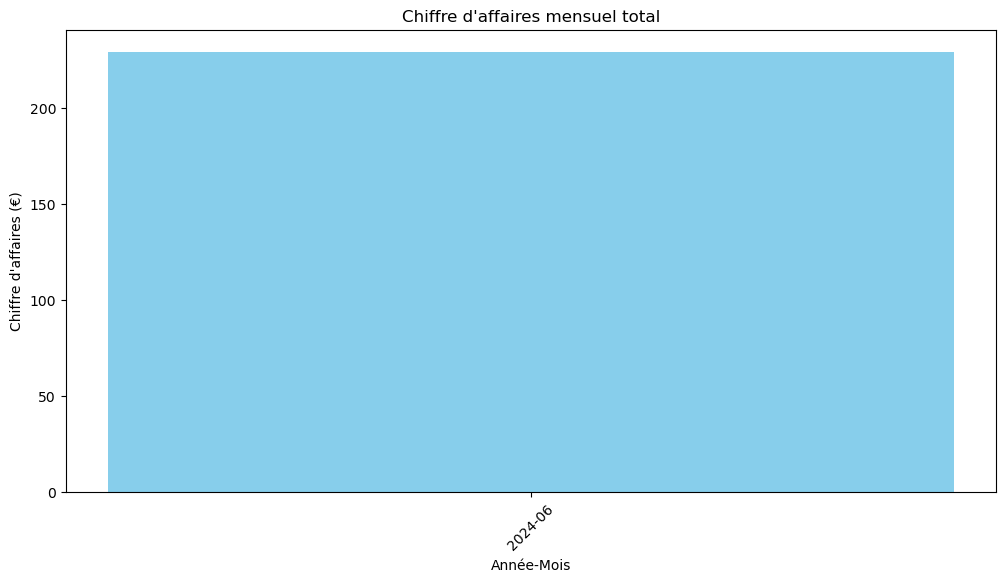

In [43]:

# 15. Créer un graphique à barres montrant le chiffre d’affaires mensuel total.

import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier Excel
df = pd.read_excel("ecommerce_transactions_modifie.xlsx")

print(df['Année-Mois'].unique())  # Vérifier les valeurs distinctes


# Vérifier que la colonne "Année-Mois" est bien formatée
df['Année-Mois'] = df['Année-Mois'].astype(str)

# Calculer le chiffre d'affaires total par mois
chiffre_affaires_mensuel = df.groupby('Année-Mois')['Montant total (€)'].sum()

# Trier les mois pour un affichage chronologique
chiffre_affaires_mensuel = chiffre_affaires_mensuel.sort_index()

# Création du graphique
plt.figure(figsize=(12,6))
plt.bar(chiffre_affaires_mensuel.index, chiffre_affaires_mensuel, color='skyblue')

# Ajouter les titres et labels
plt.xlabel("Année-Mois")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Chiffre d'affaires mensuel total")
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()